In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
file = 'C:/Users/Asus/Downloads/Mall_Customers.csv'
data = pd.read_csv(file)
X = data.drop(['CustomerID'], axis=1)
X['Genre'] = X['Genre'].apply(lambda x:1 if x == 'Male' else 0)

display(X)


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [30]:
from sklearn.cluster import KMeans
# finding optimal k value
error_rate = []
k_range = range(1,20)
for i in k_range:
    model = KMeans(n_clusters = i)
    model.fit(X)
    error_rate.append(model.inertia_)


Text(0, 0.5, 'Model Cost')

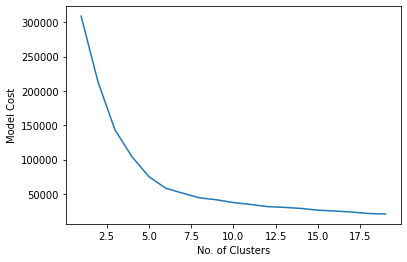

In [31]:
#Displaying elbow curve
plt.plot(k_range, error_rate)
plt.xlabel('No. of Clusters')
plt.ylabel('Model Cost')

-75399.61541401484

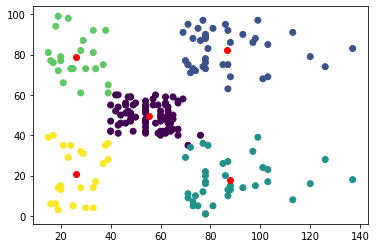

In [34]:
#Displaying the 5 clusters with their cluster centers
model = KMeans(n_clusters=5)
model.fit(X)
res = model.predict(X)
plt.scatter(X.iloc[:,2], X.iloc[:,-1], c= res)
plt.scatter(model.cluster_centers_[:,2], model.cluster_centers_[:,-1], color='red')
model.score(X)